In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [9]:
df_mobile_value = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/Thieme et al., 2015/41477_2015_BFnplants201525_MOESM2_ESM_1.txt', header=1, index_col=0, sep="\t", skipfooter=1)
mobile_value_index = np.setdiff1d(df_mobile_value.index, ['AT1G30835', 'AT1G46554', 'AT1G67105', 'AT2G13970', 'AT2G14878', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798', 'AT3G54366', 'AT5G28626', 'AT5G59732'])

/Users/siomi19/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [75]:
df_up_up = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ago1_up_deltaN_up.txt', sep="\t", header=0, index_col=0)
df_up_down = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ago1_up_deltaN_down.txt', sep="\t", header=0, index_col=0)
df_down_up = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ago1_down_deltaN_up.txt', sep="\t", header=0, index_col=0)
df_down_down = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/ago1_down_deltaN_down.txt', sep="\t", header=0, index_col=0)

dfs = [df_up_up, df_up_down, df_down_up, df_down_down]
for d in dfs:
    d.index = [i.split(":")[1] for i in d.index]

In [49]:
df_deltaN_lfc

,WT_AGO1.1,WT_AGO1.2,deltaN.1,deltaN.2,baseMean,log2FC,lfcSE,stat,p.value,q.value,q.value_BH,ranking
AT1G01010,117,165,151,200,156.046983,0.292469,0.294014,0.994747,0.319859,0.999600,1.000000,6502.0
AT1G01020,147,164,141,188,158.614726,0.045916,0.286582,0.160220,0.872708,0.999600,1.000000,20406.0
AT1G01030,59,100,119,76,88.261956,0.314477,0.431269,0.729191,0.465885,0.999600,1.000000,9720.0
AT1G01040,710,771,731,969,788.464978,0.161664,0.176795,0.914415,0.360499,0.999600,1.000000,7388.0
AT1G01050,673,856,688,899,770.528692,0.025883,0.175223,0.147715,0.882568,0.999600,1.000000,20630.0
...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01250,251,257,646,293,366.749853,0.898662,0.654568,1.372909,0.169781,0.999600,1.000000,3589.0
ATCG01270,1,9,6,7,5.550351,0.423755,1.455906,0.291060,0.771006,1.000000,1.000000,17680.0
ATCG01280,87,153,286,147,168.792625,0.885631,0.402920,2.198034,0.027947,0.517942,0.688829,1122.0
ATCG01300,727,704,685,749,715.018615,-0.031275,0.187194,-0.167070,0.867315,0.999600,1.000000,20264.0


In [4]:
df_fC = pd.read_csv(f'/Users/siomi19/Desktop/AtAgo1 RNA-seq/featureCounts/results/AtAgo1_RNA-seq_featureCounts_gene.txt',
                        skiprows=1,
                        sep="\t",
                        header=0,
                        index_col=0,
                        usecols=[0,6,7,8,9,10,11,12,13]
                        )

In [5]:
df_deltaN_lfc = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/AtAgo1_RNA-seq_featureCounts_gene_WT_AGO1_deltaN_DESeq2.txt', header=0, index_col=0, sep="\t")
df_deltaN_lfc.index = [i.split(":")[1] for i in df_deltaN_lfc.index]

In [6]:
not_exist = ['AT2G01010', 'AT2G07709', 'AT2G07711', 'AT2G07717', 'AT2G18440', 'AT3G33072', 'AT3G41768', 'AT3G42658', 'AT4G03060', 'AT5G49080', 'AT1G30835', 'AT1G46554', 'AT1G67105', 'AT2G13970', 'AT2G14878', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798', 'AT3G54366', 'AT5G28626', 'AT5G59732']

for i in not_exist:
    mobile_genes.remove(i)

In [8]:
df_target_cyt = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/upregulated/gene/DEG_WT_AGO1_ago1_0.05_0_BH.csv', header=0, index_col=0, sep="\t")
cyt_genes = [i.split(":")[1].upper() for i in df_target_cyt.index]

<AxesSubplot:xlabel='variable', ylabel='value'>

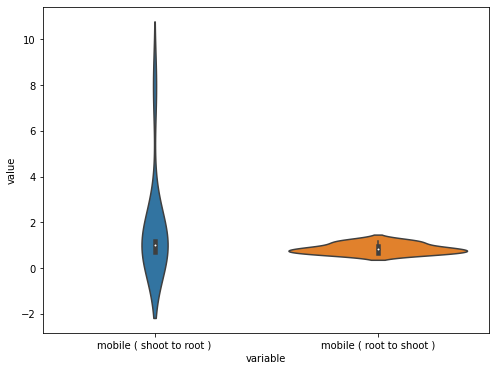

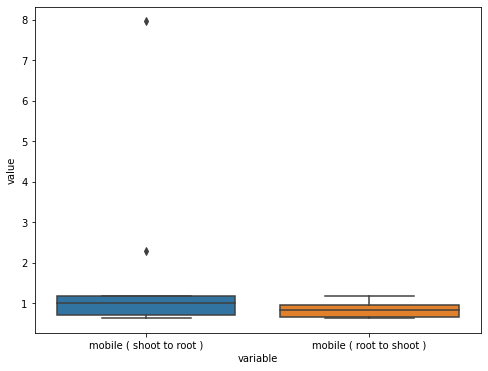

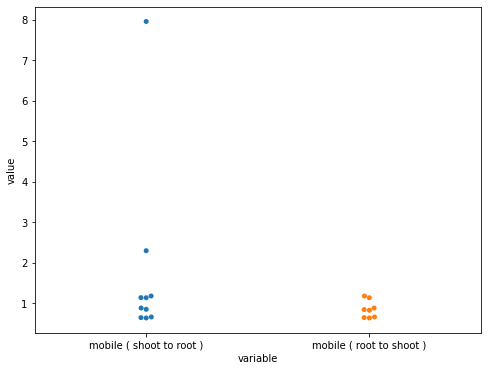

In [153]:
d = ['PED to COL', 'COL to PED', 'shoot to root', 'root to shoot']

mobile_d_index = list(df_mobile_value[d[2]].dropna().index)
mobile_r_index = list(df_mobile_value[d[3]].dropna().index)

for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_d_index.remove(ne)
    except ValueError:
        pass
for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_r_index.remove(ne)
    except ValueError:
        pass
mobile_d = df_deltaN_lfc.loc[np.intersect1d(df_deltaN_up.index, mobile_d_index), "log2FC"]
mobile_r = df_deltaN_lfc.loc[np.intersect1d(df_deltaN_up.index, mobile_r_index), "log2FC"]

df_d = pd.DataFrame({f"mobile ( {d[2]} )":mobile_d})
df_r = pd.DataFrame({f"mobile ( {d[3]} )":mobile_r})
df_cat_loc_t_melt = pd.concat([df_d, df_r], axis=1).melt()
plt.figure(figsize=(8,6))
sns.violinplot(x='variable', y='value', data=df_cat_loc_t_melt)
plt.figure(figsize=(8,6))
sns.boxplot(x='variable', y='value', data=df_cat_loc_t_melt)
plt.figure(figsize=(8,6))
sns.swarmplot(x='variable', y='value', data=df_cat_loc_t_melt)

<AxesSubplot:xlabel='variable', ylabel='value'>

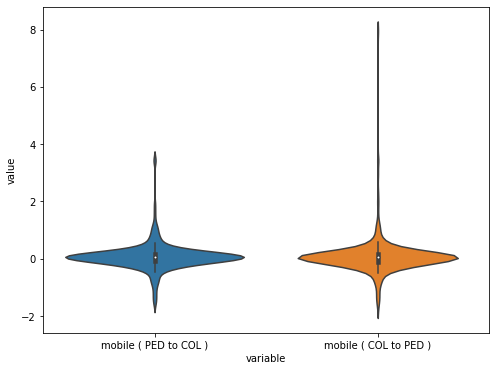

In [27]:
d = ['PED to COL', 'COL to PED', 'shoot to root', 'root to shoot']

mobile_d_index = list(df_mobile_value[d[0]].dropna().index)
mobile_r_index = list(df_mobile_value[d[1]].dropna().index)

for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_d_index.remove(ne)
    except ValueError:
        pass
for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_r_index.remove(ne)
    except ValueError:
        pass
mobile_d = df_deltaN_lfc.loc[np.intersect1d(cyt_genes, mobile_d_index), "log2FC"]
mobile_r = df_deltaN_lfc.loc[np.intersect1d(cyt_genes, mobile_r_index), "log2FC"]

df_d = pd.DataFrame({f"mobile ( {d[0]} )":mobile_d})
df_r = pd.DataFrame({f"mobile ( {d[1]} )":mobile_r})
df_cat_loc_t_melt = pd.concat([df_d, df_r], axis=1).melt()
plt.figure(figsize=(8,6))
sns.violinplot(x='variable', y='value', data=df_cat_loc_t_melt)

In [85]:
df_deltaN_up = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/upregulated/gene/DEG_WT_AGO1_deltaN_0.05_0_BH.csv', sep="\t", header=0, index_col=0)
df_deltaN_down = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/DESeq2/DEG/downregulated/gene/DEG_WT_AGO1_deltaN_0.05_0_BH.csv', sep="\t", header=0, index_col=0)

dfs = [df_deltaN_up, df_deltaN_down]
for d in dfs:
    d.index = [i.split(":")[1] for i in d.index]

In [120]:
df_mobile = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/Thieme et al., 2015/41477_2015_BFnplants201525_MOESM2_ESM.txt', header=0, index_col=0, sep="\t", skiprows=1)
mobile_genes = list(df_mobile.iloc[:,0].values)

In [157]:
len(np.intersect1d(df_deltaN_up.index, mobile_index))/len(df_deltaN_up)

0.42857142857142855

In [158]:
len(np.intersect1d(df_deltaN_down.index, mobile_index))/len(df_deltaN_down)

0.3313253012048193

In [159]:
(len(np.intersect1d(df_deltaN_up.index, mobile_index))+len(np.intersect1d(df_deltaN_down.index, mobile_index)))/(len(df_deltaN_up)+len(df_deltaN_down))

0.3601694915254237

In [160]:
3600/20000

0.18

<Figure size 576x432 with 0 Axes>

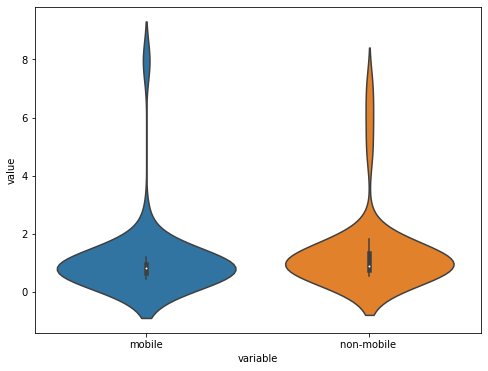

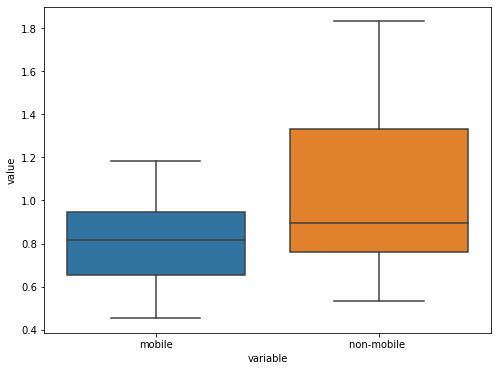

<Figure size 576x432 with 0 Axes>

In [155]:
mobile_index = mobile_genes
non_mobile_index = list(np.setdiff1d(df_deltaN_lfc.index, mobile_index))
# mobile_index = list(df_mobile_value.index)
# non_mobile_index = np.setdiff1d(df_deltaN_lfc.index, mobile_index)



for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798', 'AT2G01010', 'AT2G07709', 'AT2G07711', 'AT2G07717', 'AT2G18440', 'AT3G33072', 'AT3G41768', 'AT3G42658', 'AT4G03060', 'AT5G49080']:
    try:
        mobile_index.remove(ne)
    except ValueError:
        pass

for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798', 'AT2G01010', 'AT2G07709', 'AT2G07711', 'AT2G07717', 'AT2G18440', 'AT3G33072', 'AT3G41768', 'AT3G42658', 'AT4G03060', 'AT5G49080']:
    try:
        non_mobile_index.remove(ne)
    except ValueError:
        pass

# slicer_down = np.concatenate([df_up_up.index, df_down_up.index])
# slicer_up = np.concatenate([df_down_down.index, df_up_down.index])

# mobile_d = df_deltaN_lfc.loc[np.intersect1d(slicer_up, mobile_index), "log2FC"]
# mobile_r = df_deltaN_lfc.loc[np.intersect1d(slicer_up, non_mobile_index), "log2FC"]
mobile_d = df_deltaN_lfc.loc[np.intersect1d(df_deltaN_up.index, mobile_index), "log2FC"]
mobile_r = df_deltaN_lfc.loc[np.setdiff1d(df_deltaN_up.index, mobile_index), "log2FC"]
# mobile_d = df_deltaN_lfc.loc[mobile_index, "log2FC"]
# mobile_r = df_deltaN_lfc.loc[non_mobile_index, "log2FC"]

df_d = pd.DataFrame({f"mobile" : mobile_d})
df_r = pd.DataFrame({f"non-mobile ":mobile_r})
df_cat_loc_t_melt = pd.concat([df_d, df_r], axis=1).melt()
plt.figure(figsize=(8,6))
sns.violinplot(x='variable', y='value', data=df_cat_loc_t_melt)
plt.figure(figsize=(8,6))
sns.boxplot(x='variable', y='value', data=df_cat_loc_t_melt, sym="")
plt.figure(figsize=(8,6))
# sns.swarmplot(x='variable', y='value', data=df_cat_loc_t_melt)
# plt.ylim(0, 2)

(-1.0, 1.0)

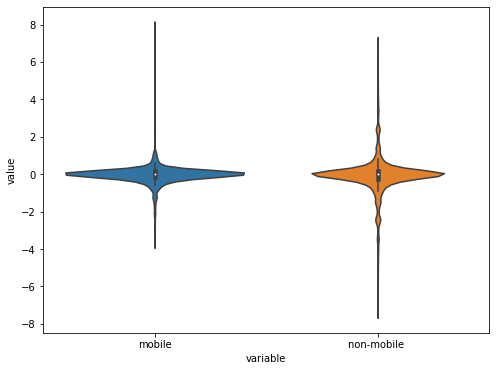

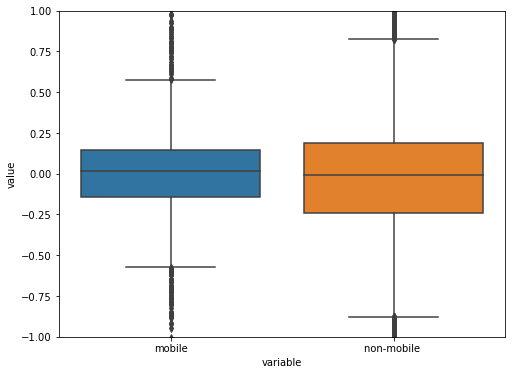

In [74]:
mobile_index = list(df_mobile_value.index)
non_mobile_index = np.setdiff1d(df_deltaN_lfc.index, mobile_index)

for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_index.remove(ne)
    except ValueError:
        pass

# for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
#     try:
#         non_mobile_index.remove(ne)
#     except ValueError:
#         pass

mobile_d = df_deltaN_lfc.loc[mobile_index, "log2FC"].dropna()
mobile_r = df_deltaN_lfc.loc[non_mobile_index, "log2FC"].dropna()

df_d = pd.DataFrame({f"mobile" : mobile_d})
df_r = pd.DataFrame({f"non-mobile ":mobile_r})
df_cat_loc_t_melt = pd.concat([df_d, df_r], axis=1).melt()
plt.figure(figsize=(8,6))
sns.violinplot(x='variable', y='value', data=df_cat_loc_t_melt)
plt.figure(figsize=(8,6))
sns.boxplot(x='variable', y='value', data=df_cat_loc_t_melt)
plt.ylim(-1,1)

<AxesSubplot:xlabel='variable', ylabel='value'>

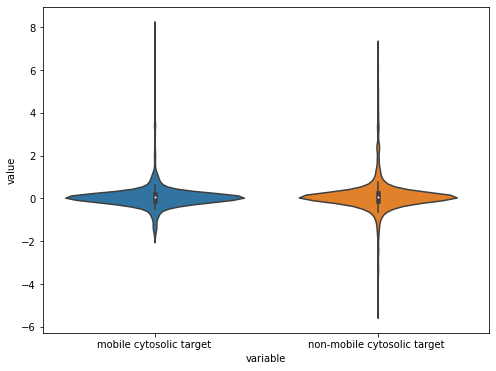

In [36]:
mobile_index = list(df_mobile_value.index)
non_mobile_index = np.setdiff1d(df_deltaN_lfc.index, mobile_index)

for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_index.remove(ne)
    except ValueError:
        pass

# for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
#     try:
#         non_mobile_index.remove(ne)
#     except ValueError:
#         pass

mobile_d = df_deltaN_lfc.loc[np.intersect1d(cyt_genes, mobile_index), "log2FC"].dropna()
mobile_r = df_deltaN_lfc.loc[np.intersect1d(cyt_genes, non_mobile_index), "log2FC"].dropna()

df_d = pd.DataFrame({f"mobile cytosolic target" : mobile_d})
df_r = pd.DataFrame({f"non-mobile cytosolic target ":mobile_r})
df_cat_loc_t_melt = pd.concat([df_d, df_r], axis=1).melt()
plt.figure(figsize=(8,6))
sns.violinplot(x='variable', y='value', data=df_cat_loc_t_melt)

In [108]:
A_var = np.var(mobile_d.values, ddof=1)  # Aの不偏分散
B_var = np.var(mobile_r.values, ddof=1)  # Bの不偏分散
A_df = len(mobile_d.values) - 1  # Aの自由度
B_df = len(mobile_r.values) - 1  # Bの自由度
f = A_var / B_var  # F比の値
one_sided_pval1 = stats.f.cdf(f, A_df, B_df)  # 片側検定のp値 1
one_sided_pval2 = stats.f.sf(f, A_df, B_df)   # 片側検定のp値 2
two_sided_pval = min(one_sided_pval1, one_sided_pval2) * 2  # 両側検定のp値

print('F:       ', round(f, 3))
print('p-value: ', round(two_sided_pval, 3))

F:        1.569
p-value:  0.287


In [109]:
stats.ttest_ind(mobile_d.values, mobile_r.values, equal_var=False)

Ttest_indResult(statistic=-0.8915051036699471, pvalue=0.38327144069452057)

In [44]:
cyt_mobile_genes = np.intersect1d(cyt_genes, mobile_index)

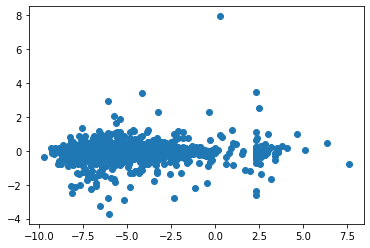

In [68]:
x = df_deltaN_lfc.loc[mobile_index, "log2FC"]
y = df_mobile_value.loc[mobile_index, 'Unnamed: 14']
plt.scatter(y, x)

In [62]:
df_mobile_value

,PED to COL,COL to PED,shoot to root,root to shoot,FN,-N,-P,root,rosette,lower stem,...,Unnamed: 1013,Unnamed: 1014,Unnamed: 1015,Unnamed: 1016,Unnamed: 1017,Unnamed: 1018,Unnamed: 1019,Unnamed: 1020,Unnamed: 1021,Unnamed: 1022
AT1G01040,PED to COL,NaN,NaN,root to shoot,FN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT1G01300,NaN,COL to PED,NaN,root to shoot,FN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT1G01360,NaN,COL to PED,shoot to root,NaN,FN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT1G01540,PED to COL,NaN,NaN,root to shoot,FN,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT1G01720,NaN,COL to PED,shoot to root,NaN,FN,NaN,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G67400,PED to COL,NaN,NaN,root to shoot,FN,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT5G67470,NaN,COL to PED,shoot to root,root to shoot,FN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT5G67500,NaN,COL to PED,shoot to root,NaN,FN,NaN,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT5G67560,NaN,COL to PED,shoot to root,NaN,FN,NaN,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [310]:
nuc = df_deltaN_lfc.loc[nuc_genes, "log2FC"].dropna().values
cyt = df_deltaN_lfc.loc[cyt_genes, "log2FC"].dropna().values
mobile = df_deltaN_lfc.loc[mobile_genes, "log2FC"].dropna().values
non_mobile = df_deltaN_lfc.loc[non_mobile_genes, "log2FC"].dropna().values
nuc_mobile = df_deltaN_lfc.loc[np.intersect1d(nuc_genes, mobile_genes), "log2FC"].dropna().values
nuc_non_mobile = df_deltaN_lfc.loc[np.intersect1d(nuc_genes, non_mobile_genes), "log2FC"].dropna().values
cyt_mobile = df_deltaN_lfc.loc[np.intersect1d(cyt_genes, mobile_genes), "log2FC"].dropna().values
cyt_non_mobile = df_deltaN_lfc.loc[np.intersect1d(cyt_genes, non_mobile_genes), "log2FC"].dropna().values

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f8238c32130>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f8238c32d90>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f8238d05940>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f8238d05640>}

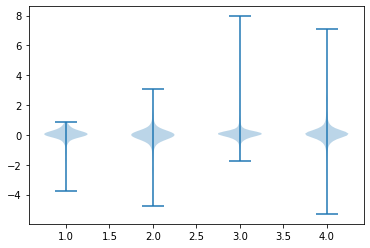

In [311]:
plt.violinplot([nuc_mobile, nuc_non_mobile, cyt_mobile, cyt_non_mobile])

In [312]:
df_nuc_mobile = pd.DataFrame({"nuc_mobile":nuc_mobile})
df_nuc_non_mobile = pd.DataFrame({"nuc_non_mobile":nuc_non_mobile})
df_cyt_mobile = pd.DataFrame({"cyt_mobile":cyt_mobile})
df_cyt_non_mobile = pd.DataFrame({"cyt_non_mobile":cyt_non_mobile})

In [313]:
df_cat = pd.concat([df_nuc_mobile, df_nuc_non_mobile, df_cyt_mobile, df_cyt_non_mobile], axis=1)
df_cat_melt = df_cat.melt()

In [314]:
df_cat_melt

,variable,value
0,nuc_mobile,-0.268931
1,nuc_mobile,0.454169
2,nuc_mobile,0.546842
3,nuc_mobile,-0.067023
4,nuc_mobile,-0.089388
...,...,...
11267,cyt_non_mobile,0.304629
11268,cyt_non_mobile,0.578499
11269,cyt_non_mobile,0.090531
11270,cyt_non_mobile,0.506427


<AxesSubplot:xlabel='variable', ylabel='value'>

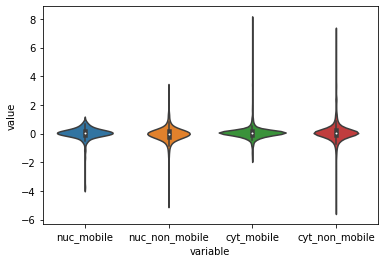

In [315]:
sns.violinplot(x='variable', y='value', data=df_cat_melt)

<AxesSubplot:xlabel='variable', ylabel='value'>

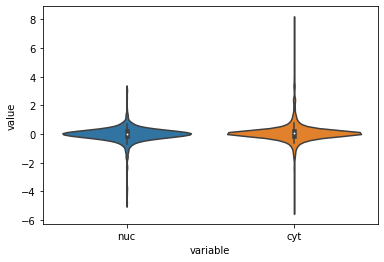

In [316]:
df_nuc = pd.DataFrame({"nuc":nuc})
df_cyt = pd.DataFrame({"cyt":cyt})
df_cat_loc_melt = pd.concat([df_nuc, df_cyt], axis=1).melt()
sns.violinplot(x='variable', y='value', data=df_cat_loc_melt)

<AxesSubplot:xlabel='variable', ylabel='value'>

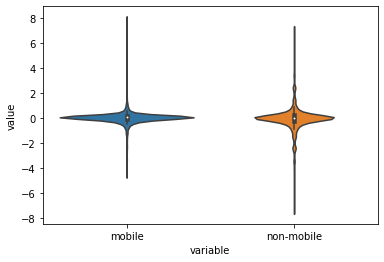

In [167]:
df_m = pd.DataFrame({"mobile":mobile})
df_n_m = pd.DataFrame({"non-mobile":non_mobile})
df_cat_loc_melt = pd.concat([df_m, df_n_m], axis=1).melt()
sns.violinplot(x='variable', y='value', data=df_cat_loc_melt)

In [207]:
np.abs(mobile)

array([0.025883  , 0.11038148, 2.85040787, ..., 0.01682886, 0.00963853,
       0.05811176])

In [190]:
df_mobile_value = pd.read_csv('/Users/siomi19/Desktop/AtAgo1 RNA-seq/Thieme et al., 2015/41477_2015_BFnplants201525_MOESM2_ESM_1.txt', header=1, index_col=0, sep="\t", skipfooter=1)
mobile_value_index = np.setdiff1d(df_mobile_value.index, ['AT1G30835', 'AT1G46554', 'AT1G67105', 'AT2G13970', 'AT2G14878', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798', 'AT3G54366', 'AT5G28626', 'AT5G59732'])

/Users/siomi19/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


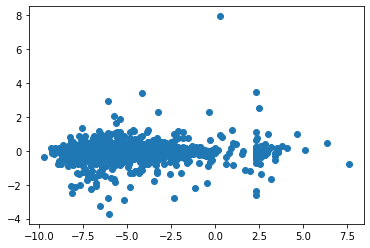

In [252]:
plt.scatter(df_mobile_value.loc[mobile_value_index, 'Unnamed: 14'], df_deltaN_lfc.loc[mobile_value_index, "log2FC"])
# plt.axis('square')
# plt.ylim(-5,4)

In [271]:
not_exist = not_exist + ['AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']

In [277]:
not_exist = list(set(not_exist))

<AxesSubplot:xlabel='variable', ylabel='value'>

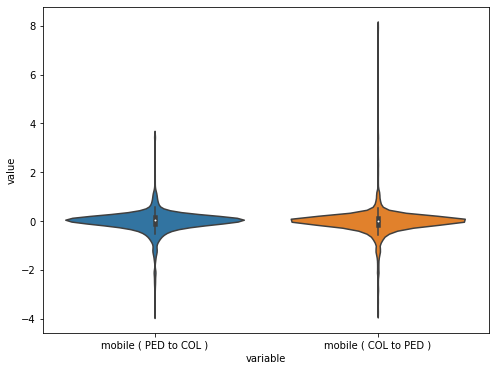

In [291]:
d = ['PED to COL', 'COL to PED', 'shoot to root', 'root to shoot']

mobile_d_index = list(df_mobile_value[d[0]].dropna().index)
mobile_r_index = list(df_mobile_value[d[1]].dropna().index)

for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_d_index.remove(ne)
    except ValueError:
        pass
for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_r_index.remove(ne)
    except ValueError:
        pass
mobile_d = df_deltaN_lfc.loc[mobile_d_index, "log2FC"]
mobile_r = df_deltaN_lfc.loc[mobile_r_index, "log2FC"]

df_d = pd.DataFrame({f"mobile ( {d[0]} )":mobile_d})
df_r = pd.DataFrame({f"mobile ( {d[1]} )":mobile_r})
df_cat_loc_t_melt = pd.concat([df_d, df_r], axis=1).melt()
plt.figure(figsize=(8,6))
sns.violinplot(x='variable', y='value', data=df_cat_loc_t_melt)

<AxesSubplot:xlabel='variable', ylabel='value'>

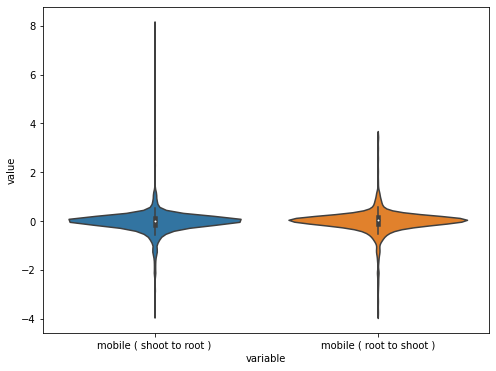

In [292]:
d = ['PED to COL', 'COL to PED', 'shoot to root', 'root to shoot']

mobile_d_index = list(df_mobile_value[d[2]].dropna().index)
mobile_r_index = list(df_mobile_value[d[3]].dropna().index)

for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_d_index.remove(ne)
    except ValueError:
        pass
for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_r_index.remove(ne)
    except ValueError:
        pass
mobile_d = df_deltaN_lfc.loc[mobile_d_index, "log2FC"]
mobile_r = df_deltaN_lfc.loc[mobile_r_index, "log2FC"]

df_d = pd.DataFrame({f"mobile ( {d[2]} )":mobile_d})
df_r = pd.DataFrame({f"mobile ( {d[3]} )":mobile_r})
df_cat_loc_t_melt = pd.concat([df_d, df_r], axis=1).melt()
plt.figure(figsize=(8,6))
sns.violinplot(x='variable', y='value', data=df_cat_loc_t_melt)

<AxesSubplot:xlabel='variable', ylabel='value'>

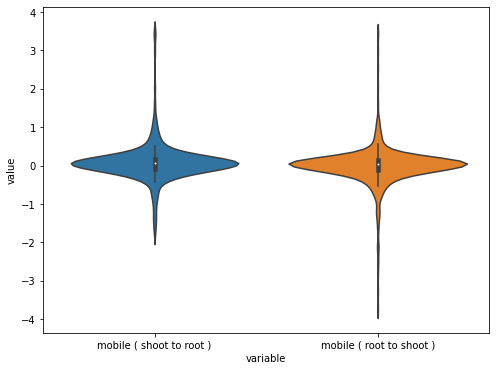

In [318]:
d = ['PED to COL', 'COL to PED', 'shoot to root', 'root to shoot']

mobile_d_index = list(df_mobile_value[d[2]].dropna().index)
mobile_r_index = list(df_mobile_value[d[3]].dropna().index)

for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_d_index.remove(ne)
    except ValueError:
        pass
for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_r_index.remove(ne)
    except ValueError:
        pass
mobile_d = df_deltaN_lfc.loc[np.intersect1d(cyt_genes, mobile_d_index), "log2FC"]
mobile_d = df_deltaN_lfc.loc[np.intersect1d(cyt_genes, mobile_r_index), "log2FC"]

df_d = pd.DataFrame({f"mobile ( {d[2]} )":mobile_d})
df_r = pd.DataFrame({f"mobile ( {d[3]} )":mobile_r})
df_cat_loc_t_melt = pd.concat([df_d, df_r], axis=1).melt()
plt.figure(figsize=(8,6))
sns.violinplot(x='variable', y='value', data=df_cat_loc_t_melt)

<AxesSubplot:xlabel='variable', ylabel='value'>

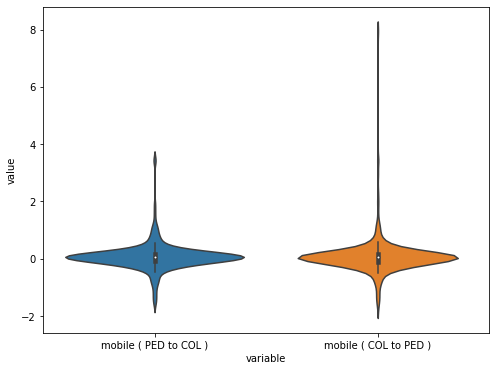

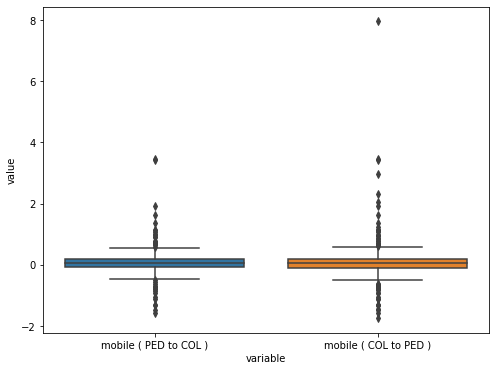

In [139]:
d = ['PED to COL', 'COL to PED', 'shoot to root', 'root to shoot']

mobile_d_index = list(df_mobile_value[d[0]].dropna().index)
mobile_r_index = list(df_mobile_value[d[1]].dropna().index)

for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_d_index.remove(ne)
    except ValueError:
        pass
for ne in ['AT1G30835', 'AT1G46554', 'AT2G14878', 'AT3G54366', 'AT5G28626', 'AT5G59732', 'AT1G67105', 'AT2G13970', 'AT2G22821', 'AT2G26355', 'AT3G06125', 'AT3G15536', 'AT3G22121', 'AT3G44798']:
    try:
        mobile_r_index.remove(ne)
    except ValueError:
        pass
mobile_d = df_deltaN_lfc.loc[np.intersect1d(cyt_genes, mobile_d_index), "log2FC"]
mobile_r = df_deltaN_lfc.loc[np.intersect1d(cyt_genes, mobile_r_index), "log2FC"]

df_d = pd.DataFrame({f"mobile ( {d[0]} )":mobile_d})
df_r = pd.DataFrame({f"mobile ( {d[1]} )":mobile_r})
df_cat_loc_t_melt = pd.concat([df_d, df_r], axis=1).melt()
plt.figure(figsize=(8,6))
sns.violinplot(x='variable', y='value', data=df_cat_loc_t_melt)
plt.figure(figsize=(8,6))
sns.boxplot(x='variable', y='value', data=df_cat_loc_t_melt)

In [246]:
x = pd.DataFrame(df_mobile_value.loc[mobile_value_index, 'Unnamed: 14'])
x.columns = ["col"]
y = pd.DataFrame(df_deltaN_lfc.loc[mobile_value_index, "log2FC"])
y.columns = ["col"]

In [247]:
res=x.corrwith(y)

In [248]:
print(res)

col    0.011589
dtype: float64


In [ ]:
d

In [249]:
x

,col
AT1G01040,-6.074677
AT1G01300,-6.004501
AT1G01360,-5.638074
AT1G01540,-4.722466
AT1G01720,-6.364667
...,...
AT5G67400,2.321928
AT5G67470,-4.915965
AT5G67500,-6.090995
AT5G67560,-6.684287


In [250]:
y

,col
AT1G01040,0.161664
AT1G01300,0.130459
AT1G01360,0.038612
AT1G01540,0.346974
AT1G01720,-0.261326
...,...
AT5G67400,-0.701112
AT5G67470,0.471497
AT5G67500,-0.016829
AT5G67560,-0.009639
